In [1]:
# Show plots inline, and load main getdist plot module and samples class
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys, os
sys.path.insert(0,os.path.realpath(os.path.join(os.getcwd(),'..')))
from getdist import plots, MCSamples
import getdist
import matplotlib.pyplot as plt
import IPython
import emcee
import numpy as np
root = '/home/manvendra/post_doc_ahduni/sim/mod_grav/test_mc'

In [2]:
files = [x for x in os.listdir() if x.endswith(".h5")]
read_list = [emcee.backends.HDFBackend(x) for x in files]

In [4]:
samp_list = []
samp_log_prob_list = []
i=0
burn_in_frac = 0.2
for r in read_list:
    s = r.get_chain(flat=True)
    samp_list.append(s)
    samp_log_probs = r.get_log_prob(flat=True)
    samp_log_prob_list.append(samp_log_probs)
    nrows = s.shape[0]
    burn_in = int(burn_in_frac*nrows)
    print(nrows,burn_in)
    if i==0:
        samps = s
    else:
        samps = np.append(samps[burn_in:,:],s,axis=0)
        
    i=i+1



ndim=3
names = ["\Omega_{dm}","B_1","\sigma_8"]
labels =  ["\Omega_{dm}","B_1","\sigma_8"]
samples = MCSamples(samples=samp_list,loglikes=samp_log_prob_list,names = names, labels = labels)

1000000 200000
1000000 200000
1000000 200000
1000000 200000
1000000 200000
1000000 200000
1000000 200000
Removed no burn in


/home/manvendra/.local/lib/python3.7/site-packages/getdist/mcsamples.py:2058: RuntimeWarning: invalid value encountered in subtract
  m.logMeanLike = -np.log(self.mean(np.exp(-(self.loglikes - maxlike)))) + maxlike
/home/manvendra/.local/lib/python3.7/site-packages/getdist/mcsamples.py:2060: RuntimeWarning: invalid value encountered in double_scalars
  m.complexity = 2 * (self.mean_loglike - maxlike)


In [12]:
s2 = MCSamples(samples=samp_list,names = names, labels = labels)

Removed no burn in


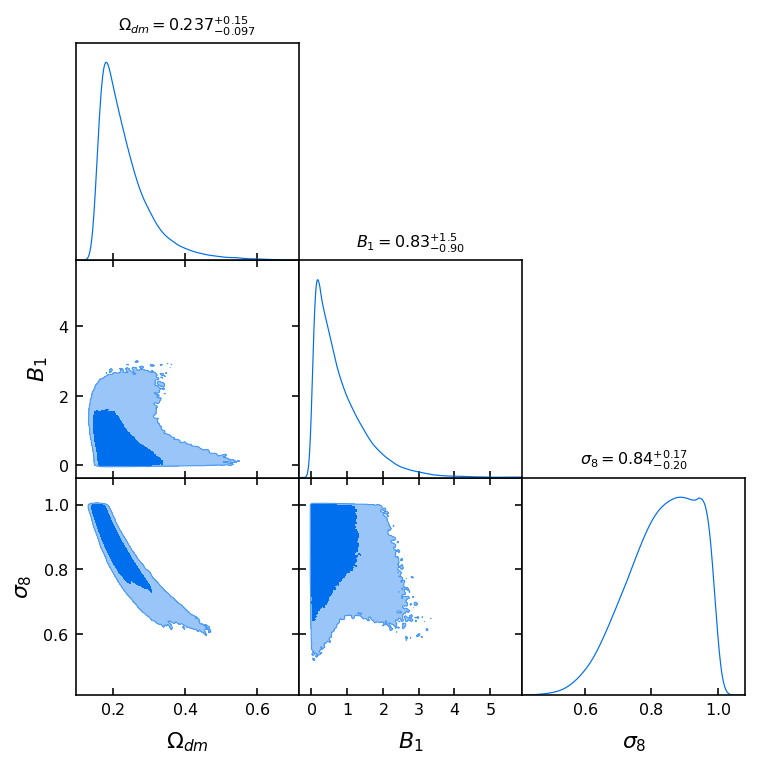

In [13]:
g = plots.get_subplot_plotter()
g.triangle_plot(s2,filled=True,title_limit=2)

In [8]:
#samples.getGelmanRubin()
#samples.getGelmanRubinEigenvalues()
samples.getConvergeTests(writeDataToFile=True)

'Parameter autocorrelation lengths (effective number of samples N_eff = tot weight/weight length)\n\n              Weight Length   Sample length           N_eff\n\\Omega_{dm}        1.00E+00            1.00         7000062\nB_1                1.00E+00            1.00         7000569\n\\sigma_8           1.00E+00            1.00         7000109\n\n\nmean convergence stats using remaining chains\nparam sqrt(var(chain mean)/mean(chain var))\n\n\\Omega_{dm}     0.0032  \\Omega_{dm}\nB_1             0.0097  B_1\n\\sigma_8        0.0043  \\sigma_8\n\nvar(mean)/mean(var) for eigenvalues of covariance of y of orthonormalized parameters\n  1     -0.00000\n  2      0.00000\n  3      0.00010\n\nSplit tests: rms_n([delta(upper/lower quantile)]/sd) n={2,3,4}, limit=95%:\ni.e. mean sample splitting change in the quantiles in units of the st. dev.\n\n\\Omega_{dm}    0.0001   0.0104   0.0258 upper\n\\Omega_{dm}    0.0001   0.0004   0.0006 lower\nB_1            0.0114   0.0053   0.0480 upper\nB_1      

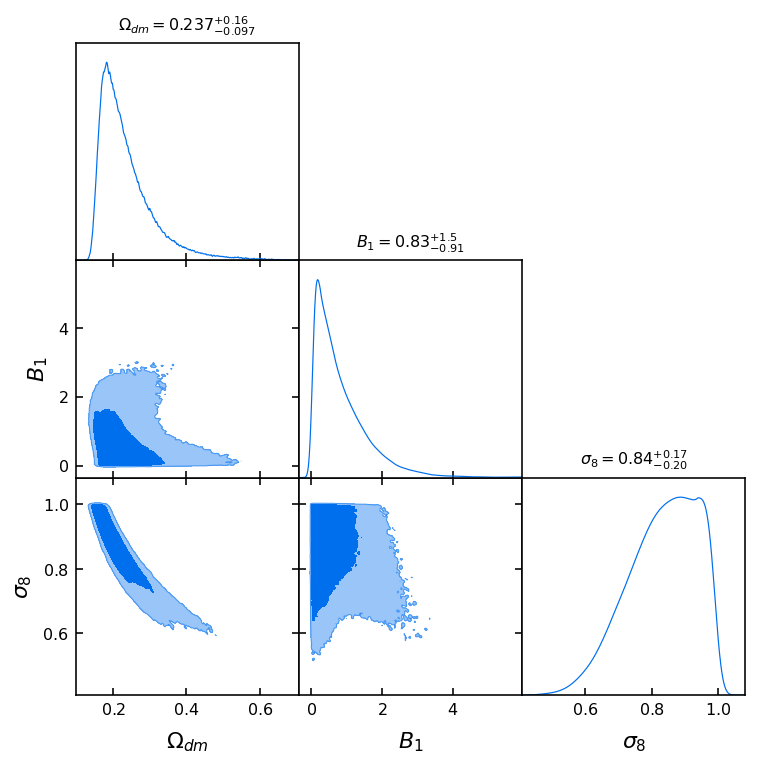

In [28]:
g = plots.get_subplot_plotter()
g.triangle_plot(samples,filled=True,title_limit=2)

((0.09817509663275717, 0.7069310782509272),
 (-0.3497924331447835, 5.958331391320398))

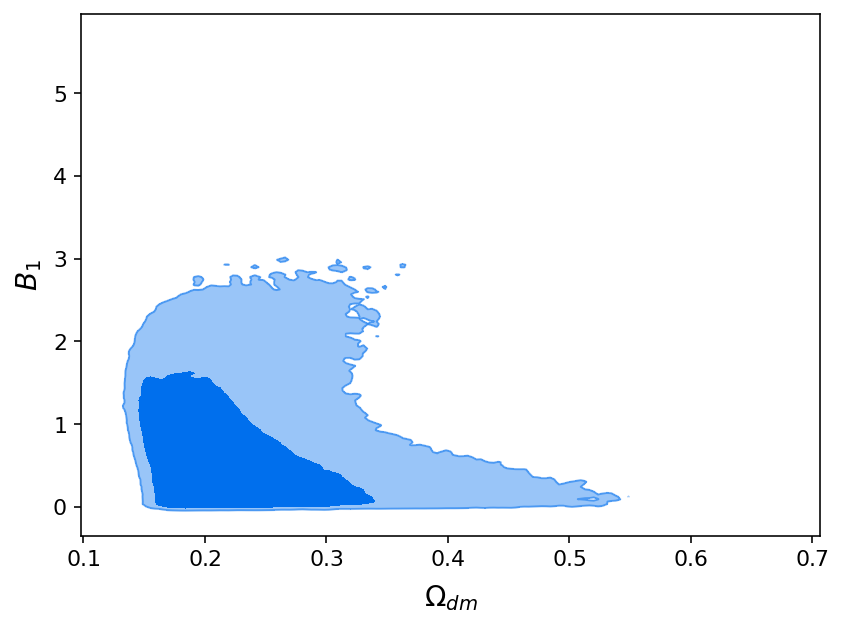

In [30]:
#samples.updateSettings({'contours': [0.68, 0.95, 0.99]})
g = plots.get_single_plotter()
g.plot_2d(samples, '\Omega_{dm}', 'B_1',title_limit=2,filled=True)

((0.4092125785435986, 1.0834055548779211),
 (-0.3497924331447835, 5.958331391320398))

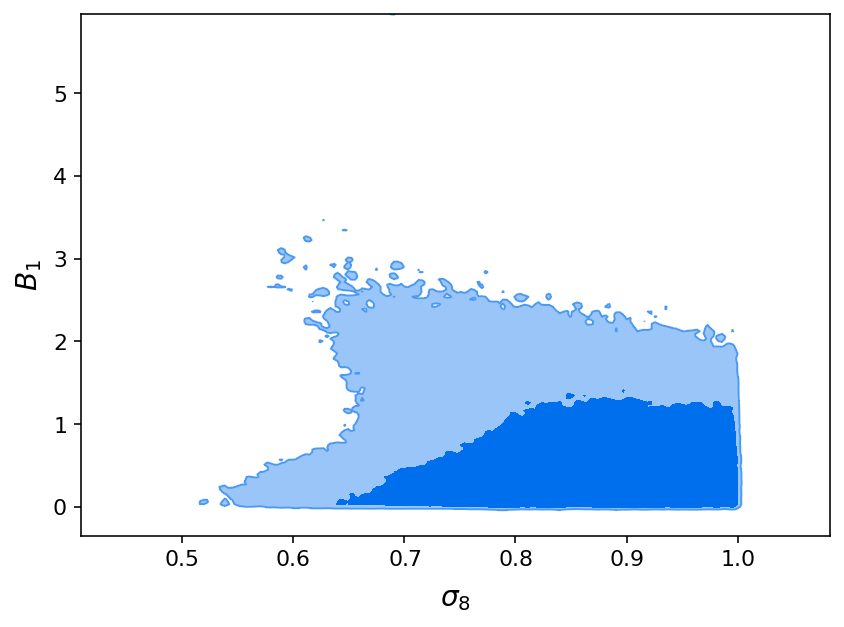

In [31]:
g = plots.get_single_plotter()
g.plot_2d(samples, '\sigma_8', 'B_1', title_limit=2,filled=True)

((0.09817509663275717, 0.7069310782509272),
 (0.4092125785435986, 1.0834055548779211))

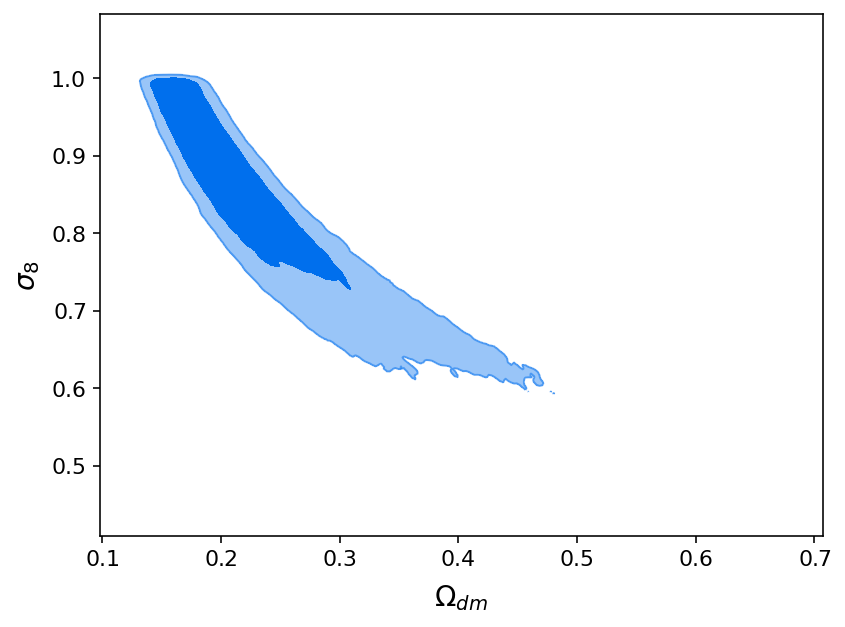

In [32]:
g = plots.get_single_plotter()
g.plot_2d(samples,'\Omega_{dm}','\sigma_8',title_limit=2, filled=True)

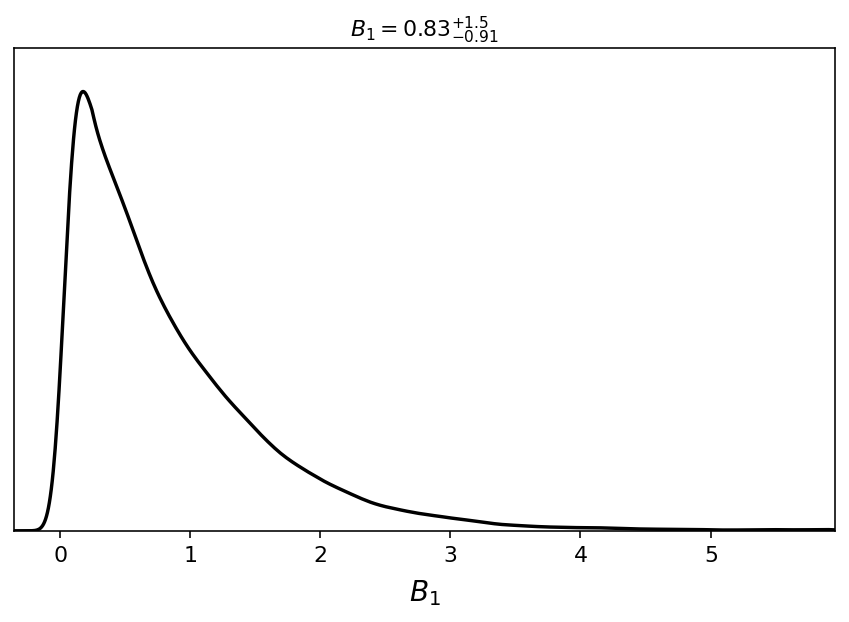

In [33]:
g = plots.get_single_plotter()
g.plot_1d(samples,'B_1',title_limit=2)